In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df.iloc[:, :4].values
Y = df['Species'].values


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (120, 4), Y: (120,)
Test  Dataset Size - X: (30, 4), Y: (30,)


GaussianNB()

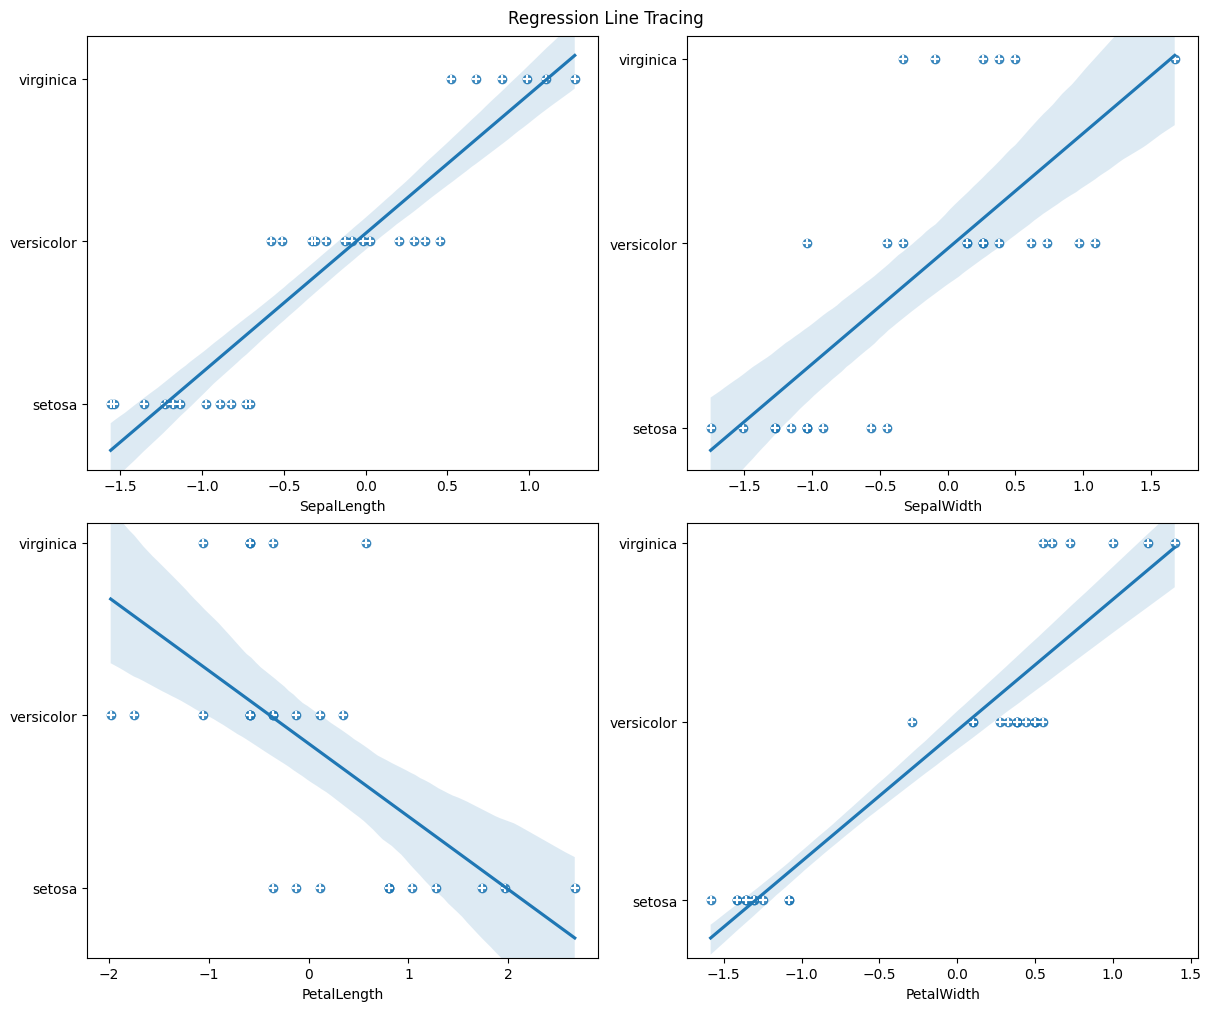

In [6]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)

mapper = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
predictions_ = [mapper[i] for i in predictions]

fig, axs = plt.subplots(2, 2, figsize = (12, 10), constrained_layout = True);
_ = fig.suptitle('Regression Line Tracing')

for i in range(4):
    x, y = i // 2, i % 2
    _ = sns.regplot(x = X_test[:, i], y = predictions_, ax=axs[x, y])
    _ = axs[x, y].scatter(X_test[:, i][::-1], Y_test[::-1], marker = '+', color="white")
    _ = axs[x, y].set_xlabel(df.columns[i + 1][:-2])

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_test, predictions)
print(f'''Confusion matrix :\n
               | Positive Prediction\t| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) {cm[0, 0]}\t| False Negative (FN) {cm[0, 1]}
---------------+------------------------+----------------------
Negative Class | False Positive (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n\n''')

cm = classification_report(Y_test, predictions)
print('Classification report : \n', cm)

Confusion matrix :

               | Positive Prediction	| Negative Prediction
---------------+------------------------+----------------------
Positive Class | True Positive (TP) 11	| False Negative (FN) 0
---------------+------------------------+----------------------
Negative Class | False Positive (FP) 0	| True Negative (TN) 13


Classification report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

